### Executive Summary ###

- This data set includes 2,443,651 records for products on amazon.co.uk
- The top 5 listed product categories are sports & outdoors, beauty, handmade clothing shoes & accessories, bath & body, and birthday gifts. Products in the category "sports and outdoors" dominate the listings.
- The prices range from zero to 100k. There are indeed indicators of a significant spread in prices. For example, looking at the IQR, we see that 75% of all products in the data set cost 46 pounds or less. That is far below the highest price point in the range at 100k.
- The average rating for the products in the data set is 2.15, but this is being significantly impacted by a very large number of products with a rating of zero. I suspect that any unrated product purchase may have been translated into a rating of zero rather than a null rating.
- If we drop the products with a zero rating the average rating raises significantly from 2.15 up to 4.32. We would need to clarify whether this is the good approach, or if we should retain the products with a zero rating in analyses of product ratings.
- If we do not consider the products with a zero rating, the rating of 4.5 is the most common rating.



### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df=pd.read_csv("amz_uk_price_prediction_dataset.csv")
print(df.head())
print(df.shape)
# There are 2,443,651 rows and 9 columns.
# Columns include unique identifier, amazon id, product name, product rating, product reveiws, product price,
# whether product is a best seller (boolean), bought in last month???, and product category.

   uid        asin                                              title  stars  \
0    1  B09B96TG33  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
1    2  B01HTH3C8S  Anker Soundcore mini, Super-Portable Bluetooth...    4.7   
2    3  B09B8YWXDF  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
3    4  B09B8T5VGV  Echo Dot with clock (5th generation, 2022 rele...    4.7   
4    5  B09WX6QD65  Introducing Echo Pop | Full sound compact Wi-F...    4.6   

   reviews  price  isBestSeller  boughtInLastMonth        category  
0    15308  21.99         False                  0  Hi-Fi Speakers  
1    98099  23.99          True                  0  Hi-Fi Speakers  
2    15308  21.99         False                  0  Hi-Fi Speakers  
3     7205  31.99         False                  0  Hi-Fi Speakers  
4     1881  17.99         False                  0  Hi-Fi Speakers  
(2443651, 9)


In [6]:
# Frequency table for product category
frequency_table = df['category'].value_counts()
# Calculating the proportion of each unique value in the 'MSZoning'
proportion_table = df['category'].value_counts(normalize=True)
frequency_table, proportion_table

# The top 5 listed product categories are sports & outdoors, beauty, handmade clothing shoes & accessories, bath & body, and birthday gifts.

(category
 Sports & Outdoors                         836265
 Beauty                                     19312
 Handmade Clothing, Shoes & Accessories     19229
 Bath & Body                                19092
 Birthday Gifts                             18978
                                            ...  
 Alexa Built-In Devices                       107
 Motorbike Chassis                            107
 Plugs                                        107
 Smart Home Security & Lighting               104
 Smart Speakers                                54
 Name: count, Length: 296, dtype: int64,
 category
 Sports & Outdoors                         0.342219
 Beauty                                    0.007903
 Handmade Clothing, Shoes & Accessories    0.007869
 Bath & Body                               0.007813
 Birthday Gifts                            0.007766
                                             ...   
 Alexa Built-In Devices                    0.000044
 Motorbike Chassis       

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [8]:
mean_value = round(frequency_table.mean(),2)
median_value = frequency_table.median()
mode_value = frequency_table.mode().iloc[0]

print("Mean:", mean_value)
print("Median:", median_value)
print("Mode:", mode_value)

Mean: 8255.58
Median: 5230.5
Mode: 250


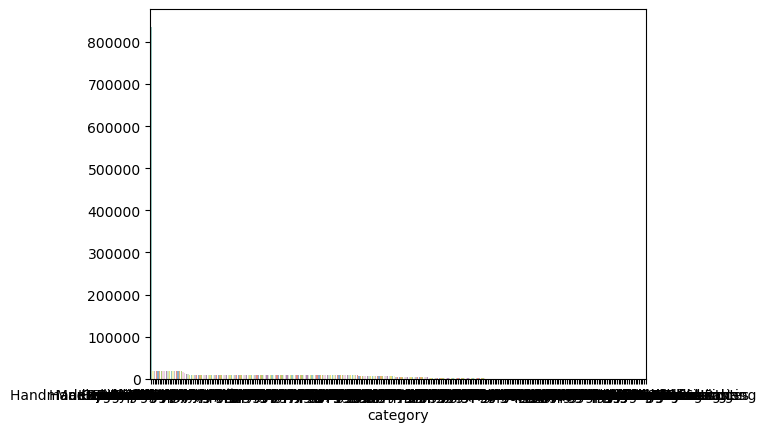

In [9]:
sns.barplot(x=frequency_table.index, y=frequency_table.values, palette="Set3")
#yikes!

<function matplotlib.pyplot.show(close=None, block=None)>

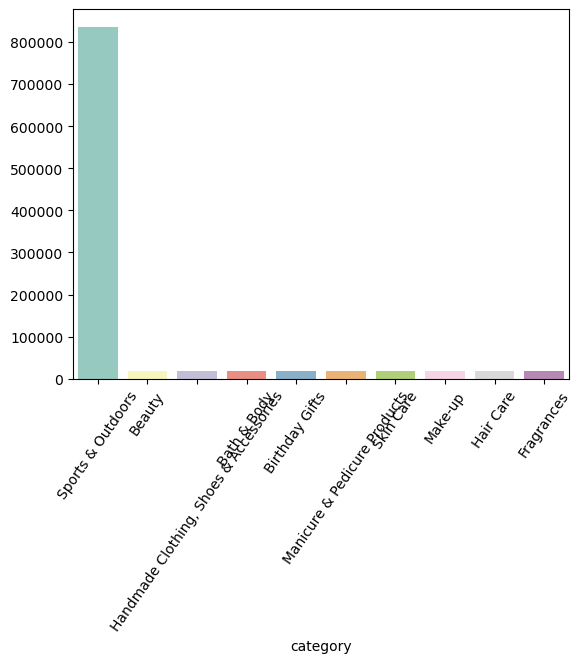

In [14]:
#subset top ten categories:
top_ten_categories = frequency_table.head(10)
sns.barplot(x=top_ten_categories.index, y=top_ten_categories.values, palette="Set3")
plt.xticks(rotation=55)
plt.show
# the labels are still messy and the top category is so much higher than the rest that the visualization is meaningless.


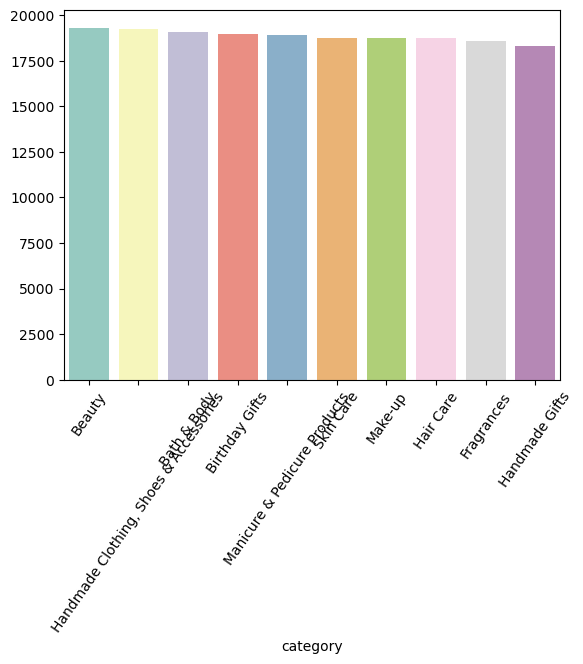

In [17]:
top_categories_without_sports = frequency_table.iloc[1:11]
sns.barplot(x=top_categories_without_sports.index, y=top_categories_without_sports.values, palette="Set3")
plt.xticks(rotation=55)
plt.show()
#this is also still messy and not particularly informative

<Axes: ylabel='count'>

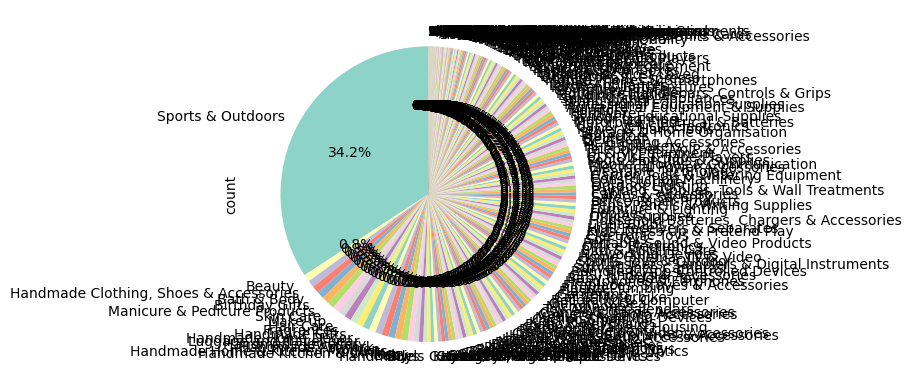

In [18]:
frequency_table.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
#Clearly products in the category "sports and outdoors" dominate the listings.

<Axes: ylabel='count'>

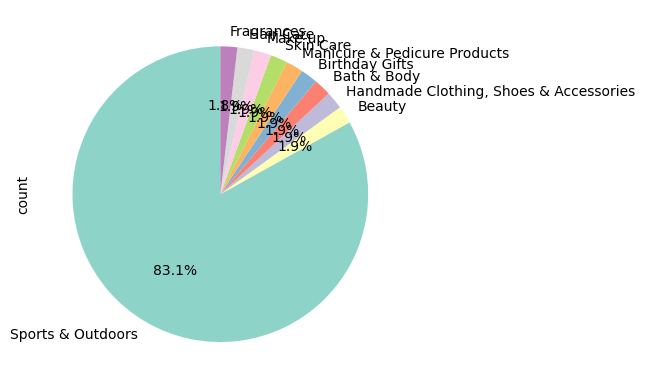

In [20]:
#but we can do a slightly prettier version
frequency_table.iloc[0:10].plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [22]:
mean_value = round(df['price'].mean(),2)
median_value = df['price'].median()
mode_value = df['price'].mode().iloc[0]

print("Mean:", mean_value)
print("Median:", median_value)
print("Mode:", mode_value)

# The average price is 89.24 which is about nine times higher than the most common price point (9.99). 
# This suggests that there are some outliers on the high end of the price range that are pulling up the mean.

Mean: 89.24
Median: 19.09
Mode: 9.99


2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

In [25]:
variance_price = round(df['price'].var(),2)
std_dev_price = round(df['price'].std(),2)
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

print("variance: ",variance_price)
print("standard deviation: ",std_dev_price)
print("Min price: ",min_price)
print("max price: ",max_price)
print("price range: ",range_price)
print("IQR: ",quantiles_price)

# The prices range from zero to 100k.
# There are indeed indicators of a significant spread in prices. For example, looking at the IQR, we see that 75% of all products 
# in the data set cost 46 pounds or less. That is far below the highest price point in the range at 100k.

variance:  119445.49
standard deviation:  345.61
Min price:  0.0
max price:  100000.0
price range:  100000.0
IQR:  0.25     9.99
0.50    19.09
0.75    45.99
Name: price, dtype: float64


3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

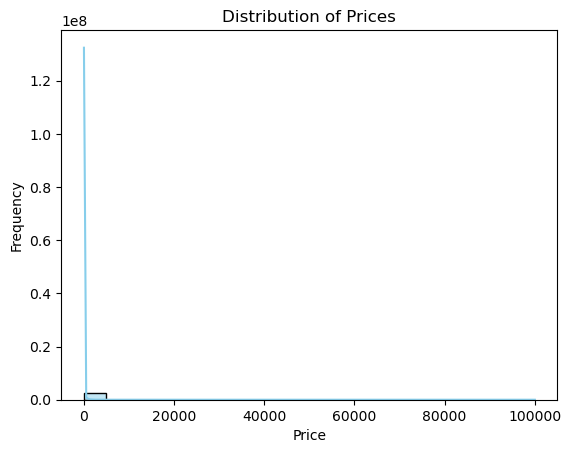

In [27]:
sns.histplot(df['price'], bins=20, color='skyblue', kde=True)

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')

plt.show()

# This is very difficult to read because there are a relatively small number of products at a much higher price point. 
# To fix this, we could subset the dataframe to exclude the outliers by defining the outlier bound as, for example, the values that 
# fall above Q3 + 1.5 * IQR.

In [31]:

Q1 = np.percentile(df['price'], 25)
Q3 = np.percentile(df['price'], 75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = [x for x in df['price'] if x < lower_bound or x > upper_bound]
outliers

#That's probably not the good definition for outliers in this case... would need to target only the very very high values...

[139.0,
 164.99,
 149.99,
 289.0,
 199.99,
 128.0,
 959.99,
 149.0,
 169.0,
 368.99,
 184.99,
 129.99,
 628.5,
 114.39,
 159.99,
 103.99,
 443.77,
 149.0,
 185.79,
 150.98,
 230.95,
 149.0,
 145.0,
 169.0,
 209.99,
 184.99,
 113.0,
 359.0,
 164.97,
 199.95,
 110.49,
 229.0,
 164.99,
 797.92,
 149.99,
 230.0,
 309.99,
 489.99,
 134.99,
 309.0,
 140.0,
 139.99,
 103.99,
 199.0,
 169.0,
 118.0,
 149.0,
 259.0,
 332.31,
 152.99,
 139.0,
 129.99,
 166.15,
 163.8,
 419.0,
 219.95,
 199.0,
 149.0,
 109.49,
 119.62,
 159.87,
 225.0,
 139.0,
 239.0,
 120.99,
 249.0,
 139.99,
 143.65,
 499.0,
 119.99,
 389.0,
 139.0,
 249.0,
 199.95,
 119.04,
 169.0,
 269.0,
 239.0,
 393.15,
 246.99,
 363.95,
 798.98,
 415.0,
 106.5,
 249.0,
 129.0,
 299.99,
 118.99,
 104.0,
 197.49,
 129.99,
 319.0,
 156.99,
 218.95,
 230.98,
 149.0,
 699.0,
 229.0,
 999.0,
 289.99,
 197.0,
 899.0,
 299.0,
 449.0,
 309.0,
 184.99,
 379.99,
 899.0,
 269.99,
 275.0,
 199.0,
 175.0,
 129.99,
 368.94,
 140.47,
 199.95,
 384.98,
 14

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

In [37]:
mean_value = round(df['stars'].mean(),2)
median_value = df['stars'].median()
mode_value = df['stars'].mode().iloc[0]
zero_count = (df['stars'] == 0).sum()

print("Mean:", mean_value)
print("Median:", median_value)
print("Mode:", mode_value)
print("Zero rating:", zero_count)

#The average rating for the products in the data set is 2.15, but this is being significantly impacted by a very large number of products
#with a rating of zero. I suspect that any unrated product purchase may have been translated into a rating of zero rather than a null rating.



Mean: 2.15
Median: 0.0
Mode: 0.0
Zero rating: 1225641


In [38]:
rating_not_zero = df[df['stars'] != 0]
#Subsetting to drop the products with a zero rating.

mean_value = round(rating_not_zero['stars'].mean(),2)
median_value = rating_not_zero['stars'].median()
mode_value = rating_not_zero['stars'].mode().iloc[0]
zero_count = (rating_not_zero['stars'] == 0).sum()

print("Mean:", mean_value)
print("Median:", median_value)
print("Mode:", mode_value)
print("Zero rating:", zero_count)

#This changes the average rating significantly from 2.15 up to 4.32.

Mean: 4.32
Median: 4.4
Mode: 4.5
Zero rating: 0


2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

In [42]:
#I'm choosing to do this with the subsetted version of the data frame that doesn't include the purchases with a zero rating.

variance_price = round(rating_not_zero['stars'].var(),2)
std_dev_price = round(rating_not_zero['stars'].std(),2)
min_price = rating_not_zero['stars'].min()
max_price = rating_not_zero['stars'].max()
range_price = max_price - min_price
quantiles_price = rating_not_zero['stars'].quantile([0.25, 0.5, 0.75])

print("variance: ",variance_price)
print("standard deviation: ",std_dev_price)
print("min rating: ",min_price)
print("max rating: ",max_price)
print("rating range: ",range_price)
print("IQR: ",quantiles_price)

# The products in the data set span the full range of ratings, from 1 to 5.
# The IQR tells us that 50% of the products have been rated between 4.1 - 4.6, so the ratings are clustered on the higher end.

variance:  0.31
standard deviation:  0.56
min rating:  1.0
max rating:  5.0
rating range:  4.0
IQR:  0.25    4.1
0.50    4.4
0.75    4.6
Name: stars, dtype: float64


3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

In [43]:
skewness_price = rating_not_zero['stars'].skew()
kurtosis_price = rating_not_zero['stars'].kurtosis()

skewness_price, kurtosis_price

# The negative value of skewness (-2.37) for the rating indicates that the distribution is left-skewed. 
# This means that the tail on the left side (lower ratings) is longer than the right side (higher ratings). 
# This suggests that there are a significant number of products that have higher ratings, which are acting as outliers and pulling the mean upwards.
  
# The kurtosis value of 9.78 is greater than 3, which indicates that the rating distribution has heavier tails and a 
# sharper peak compared to a normal distribution. This means that there are more outliers (extreme values) in the ratings 
# than one would expect in a normally distributed set.

(-2.3795681122127945, 9.78193769066435)

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

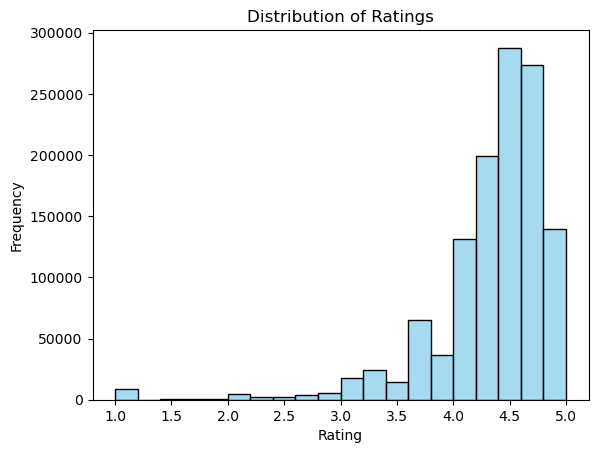

In [44]:
sns.histplot(rating_not_zero['stars'], bins=20, kde=False, color='skyblue')

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()
# A rating of 4.5 is the most common rating.